# 코로나 해외 유입 사례에 대한 분석   
---  

### 개요  
- 코로나 확진자들의 감염 경로가 해외 유입된 사례가 많은지 확인하기 위한 분석 

### 목차  
1. 데이터 로드
2. 해외 유입 사례 데이터 가공
3. 해외 유입 사례 시각화
4. 공항 감염 사례 데이터 가공
5. 공항 감염 사례 시각화 

###     시각화  

- 히트맵을 사용한 해외 유입 사례 그래프
- 히트맵을 사용한 공항 감염 사례 그래프  

### 인사이트 도출

- 3월 서울, 경기 지역에 해외 유입자 감염이 많음. 봄이라 여행다녀온 사람이 많을것 같아서 그런다고 예상하며, 김포와 인천은 공항이 있어서 더 그럴 수 있음
- 인천에 공항 감염 케이스가 많은것을 확인. 인천 국제 공항이 있어서 그렇다고 예상함. 

### 개선사항

- 해외 유입 사례중 비행기 뿐만 아니라 배편을 통해서 유입되는 사람들에 대한 데이터를 구할 수 없었음.
- 뉴스에서 3월 농작 시즌에 배편으로 국내에 들어오는 외노동자로 인한 감염이 우려된다는 뉴스를 봤으나 갖고 있는 데이터로 이를 확인할 수 없었다.
- 추후에는 보다 신뢰성있는 인사이트 도출을 위해서 양질의 데이터 수집이 중요하다고 생각함.

---
## 1. 데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pprint import pprint as pp

In [2]:
df_patient = pd.read_csv('/home/seong/workspace/covid/Data/final_table.csv')
df_dates = pd.read_csv('/home/seong/workspace/covid/Data/NJ.csv')

In [3]:
#df_patient.head()
#df_dates.head()

---
## 2. 해외 유입 사례 데이터 가공

In [4]:
#df_patient에 필요없는 컬럼 삭제
del df_patient['sex']
del df_patient['Unnamed: 0']
del df_patient['latest_confirmed']

#NJ와 df_patient를 patient_id를 기준으로 조인 시킴
dateAdded = pd.merge(df_patient, df_dates, left_on='patient_id', 
                     right_on='PATIENT_ID', how='inner')

#필요없는 컬럼 삭제
del dateAdded['CITY']
del dateAdded['PATIENT_ID']
del dateAdded['AGE']


int_cases = dateAdded[(dateAdded.infection_case == 'overseas inflow')|
                      (dateAdded.type == 'airport')]

#필요없는 컬럼 삭제
del int_cases['patient_id']
del int_cases['infected_by']

In [5]:
# 해외 유입 사례
int_cases_inf= {"province": int_cases.province,
                "infection_case": int_cases.infection_case, 
                "week_number": int_cases.week_number}

int_cases_inf= pd.DataFrame(int_cases_inf)

int_cases_inf= int_cases_inf.dropna(axis= 0)
int_cases_inf= int_cases_inf.groupby(["province", "week_number"]).count()
int_cases_inf= pd.DataFrame(int_cases_inf)
int_cases_inf= int_cases_inf.reset_index()

---
## 3. 해외 유입 사례 시각화

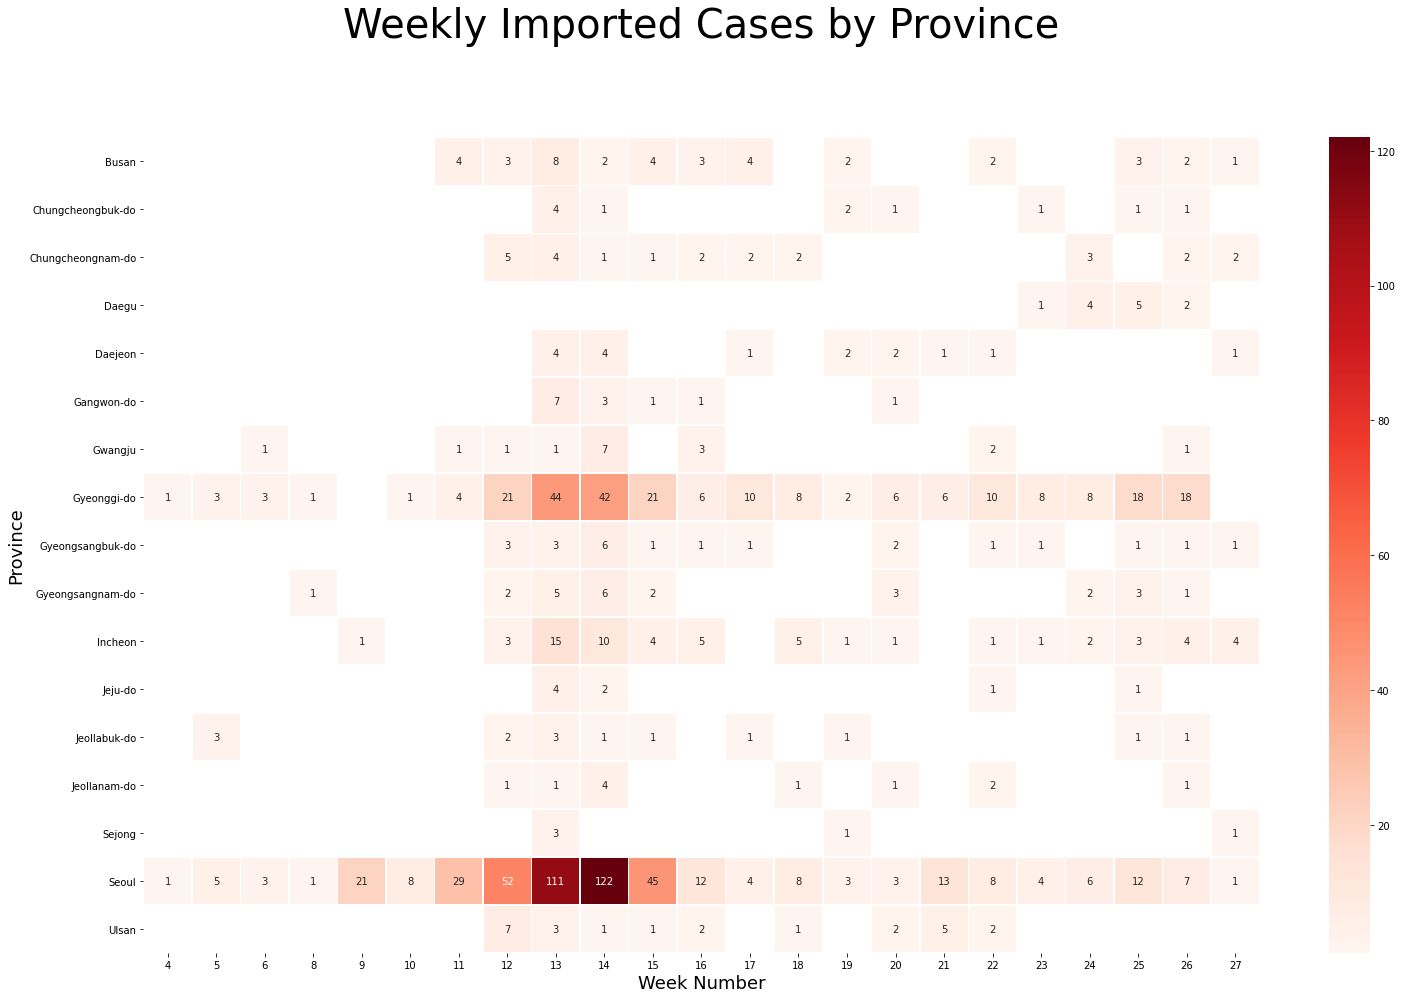

In [6]:
count = int_cases_inf.pivot("province", "week_number", "infection_case")


frame, grid = plt.subplots(figsize= (25, 15))
grid.set_title("Weekly Imported Cases by Province", fontsize=40, pad=100)
sns.heatmap(count, annot= True, linewidths= .5, ax= grid, cmap= "Reds", fmt='g')
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Province', fontsize=18)
plt.show()
# plt.savefig('Weekly_Imported_Cases_by_Province', bbox_inches='tight') # 그림파일로 그래프를 저장함

---
## 4. 공항 감염 사례 데이터 가공

In [7]:
# 공항 감염 사례
int_cases_typ= {"province": int_cases.province, "type": int_cases.type, "week_number": int_cases.week_number}
int_cases_typ= pd.DataFrame(int_cases_typ)
int_cases_typ= int_cases_typ.dropna(axis= 0)
int_cases_typ= int_cases_typ[int_cases_typ.type== "airport"]

int_cases_typ= int_cases_typ.groupby(["province", "week_number"]).count()
int_cases_typ= pd.DataFrame(int_cases_typ)
int_cases_typ= int_cases_typ.reset_index()

---
## 5. 공항 감염 사례 데이터 시각화

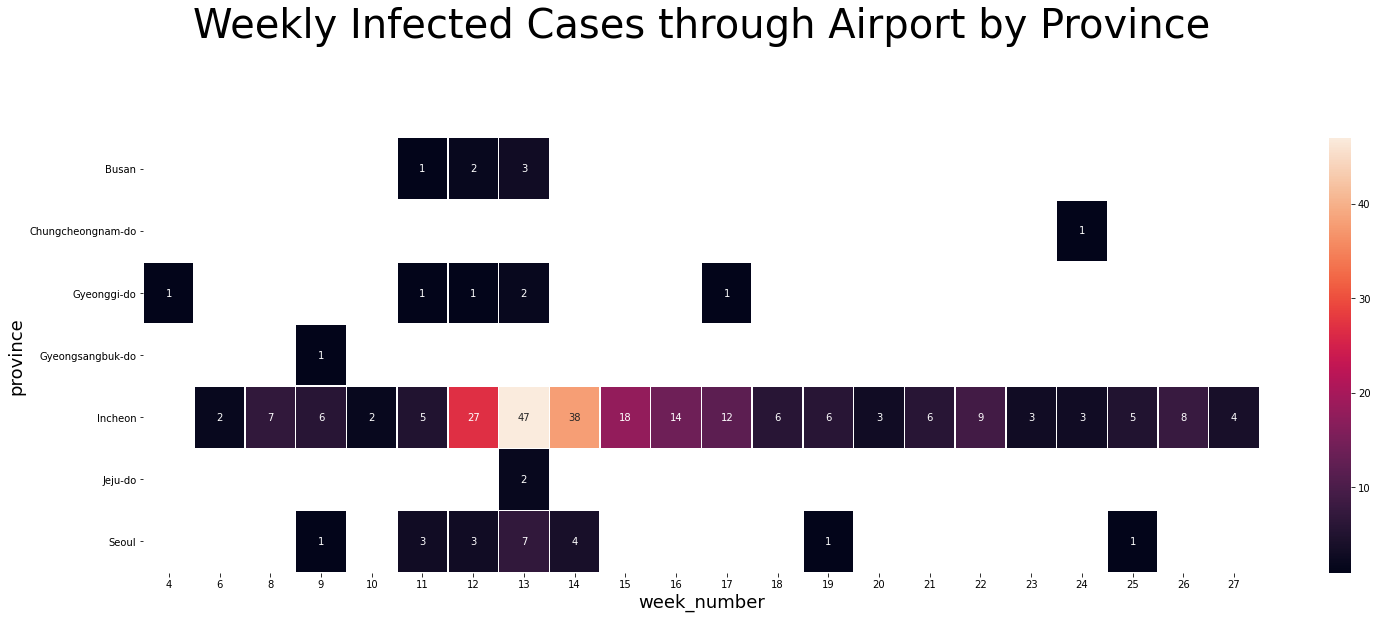

In [8]:
count = int_cases_typ.pivot("province", "week_number", "type")

frame, grid = plt.subplots(figsize= (25, 8))
grid.set_title("Weekly Infected Cases through Airport by Province", fontsize=40, pad=100)
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Province', fontsize=18)
sns.heatmap(count, annot= True, linewidths= .5, ax= grid)
plt.show()
# plt.savefig('Weekly_Infected_Cases_through_Airport_by_rovince', bbox_inches='tight') # 그림파일로 그래프를 저장함_